In [1]:
import numpy as np
from matplotlib import pyplot as plt 
from scipy.io.wavfile import read, write
from IPython.display import Audio
from numpy.fft import fft, ifft
from os import listdir
from os.path import isfile, join
import librosa
%matplotlib inline

used this link to get all filenames 
https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory

In [2]:
genre_folder = './MLP2/rawdata/genres' 
genre_names = [f for f in listdir(path=genre_folder) if not isfile(join(genre_folder, f))] 
print(*genre_names, sep = '\n')

pop
metal
disco
blues
reggae
classical
rock
hiphop
country
jazz


creating dict of genres and one random song in the file (for some reason `listdir(...)[0]` does not give the first file)

In [7]:
sample = []
for g in genre_names:
    p = genre_folder + '/' + g # path for a genre folder
    sample[g] = p # song at index 0 for each folder

TypeError: list indices must be integers or slices, not str

In [6]:
print(*sample, '\n')

pop metal disco blues reggae classical rock hiphop country jazz 



plotting the sample song for each genre

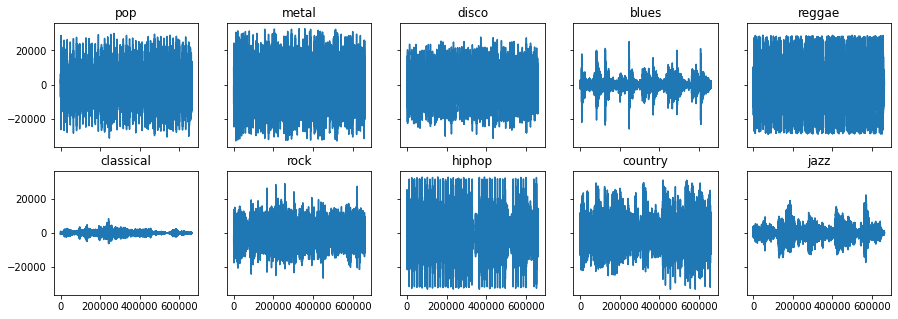

In [4]:
fig, axs = plt.subplots(2, 5, sharex=True, sharey=True, figsize=[15,5])
count = 0


for g in genre_names:
    idx = (int(count/5), count % 5)
    p = genre_folder + '/' + g + '/' + sample[g]
    sample_rate, data = read(p)
    axs[idx].plot(data)
    axs[idx].set(title=g)
    count = count + 1

plt.show()

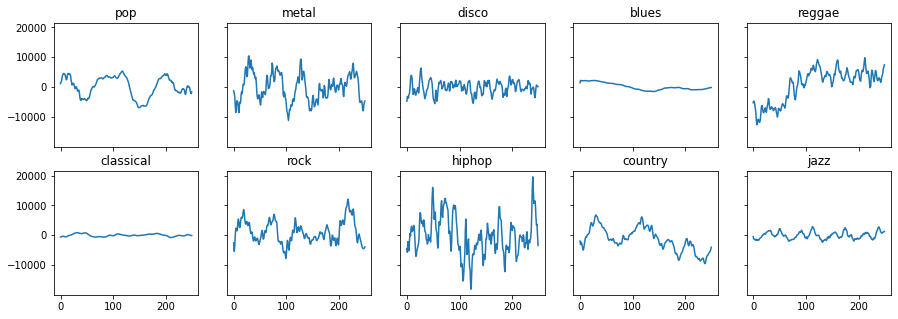

In [14]:
fig, axs = plt.subplots(2, 5, sharex=True, sharey=True, figsize=[15, 5])
count = 0

for g in genre_names:
    idx = (int(count / 5), count % 5)
    p = genre_folder + '/' + g + '/' + sample[g]
    sample_rate, data = read(p)
    axs[idx].plot(data[:250])
    axs[idx].set(title=g)
    count = count + 1

plt.show()

In [ ]:
seclong = 60                       # how many seconds long the signal will be
framerate = 22050                 # sample rate
time = np.arange(0, framerate*3)  # time vector

# here is the discrete signal
y = np.sin( 2*np.pi* 252* time/framerate ) + 0.8 * np.sin( 2*np.pi* 1200* time/framerate )

# you won't see much with the first plot, but the second zooms in a bit
plt.plot(time, y)
plt.figure()
plt.plot(time[500:1000], y[500:1000])

# we take Fourier transforms and plot
z = scipy.fftpack.fft( y )
N = int( len(y)/2 )
fftVector = z[0:N]
freq = framerate*np.arange(0,N)/len(y)

fig, ax = plt.subplots()
ax.plot(freq[1:5000], np.abs( fftVector[1:5000]))
plt.xlabel('Frequency Hz');
plt.ylabel('Absolute value of FFT')
plt.title('Plot of part Fourier transform')
plt.show()

Audio( y, rate=framerate )

## Plotting spectrograms
https://librosa.org/doc/main/auto_examples/plot_display.html

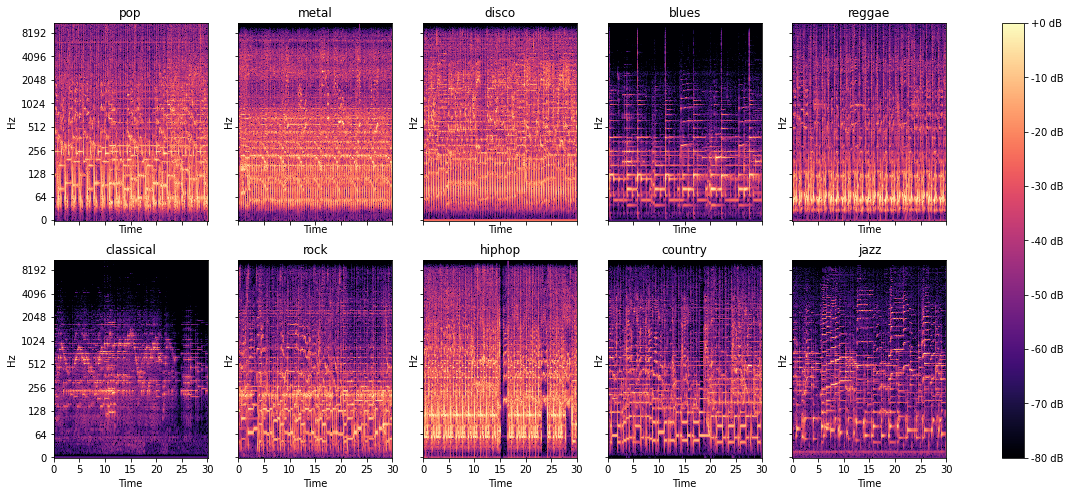

In [5]:
import librosa.display
fig, axs = plt.subplots(2, 5, sharex=True, sharey=True, figsize=[20, 8])
count = 0

for g in genre_names:
    idx = (int(count/5), count % 5)
    p = genre_folder + '/' + g + '/' + sample[g]
    # getting information from the file
    time_series, sample_rate = librosa.load(p)
    # getting a matrix which contains amplitude values according to frequency and time indexes
    stft = np.abs(librosa.stft(time_series, hop_length=512, n_fft=2048*4))
    # converting the matrix to decibel matrix
    spectrogram = librosa.amplitude_to_db(stft, ref=np.max)
    img = librosa.display.specshow(spectrogram, y_axis='log', x_axis='time', ax=axs[idx])
    axs[idx].set(title=g)
    count = count + 1

fig.colorbar(img, ax=axs, format='%+2.0f dB')
plt.show()


In [6]:
import pandas as pd
df = pd.read_csv('./MLP2/input/audio_means.csv')
df2 = pd.read_csv('./MLP2/input/dropped.csv')


In [7]:
import plotly.express as px
from sklearn.model_selection import train_test_split


In [8]:
colors = dict()
x = 0
for genre in df.genre.unique():
    colors[genre] = x
    x += 1

df['color_id'] = df.genre.apply(lambda x: colors[x])
_, df_split = train_test_split(
    df, random_state=42)
fig = px.parallel_coordinates(df.drop(columns=['bpm']), color='color_id',
                              color_continuous_scale='rainbow',
                              color_continuous_midpoint=5)
fig.show()


In [9]:
df2.columns

Index(['instance_id', 'artist_name', 'track_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'music_genre'],
      dtype='object')

In [10]:
colors = dict()
x = 0
for genre in df2.music_genre.unique():
    colors[genre] = x
    x += 1

_, df2_split = train_test_split(
    df2, random_state=42, shuffle = True)

df2['color_id'] = df2_split.music_genre.apply(lambda x: colors[x])
fig = px.parallel_coordinates(df2.drop(columns=['Unnamed: 0']), color='color_id',
                              color_continuous_scale='rainbow',
                              color_continuous_midpoint=5)
fig.show()


KeyError: "['Unnamed: 0'] not found in axis"